# Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data Science Project/Online Retail.xlsx'
df= pd.read_excel(path)

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df[df.columns[df.isna().any()]]

,Description,CustomerID
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0
1,WHITE METAL LANTERN,17850.0
2,CREAM CUPID HEARTS COAT HANGER,17850.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12680.0
541905,CHILDREN'S APRON DOLLY GIRL,12680.0
541906,CHILDRENS CUTLERY DOLLY GIRL,12680.0
541907,CHILDRENS CUTLERY CIRCUS PARADE,12680.0


In [ ]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


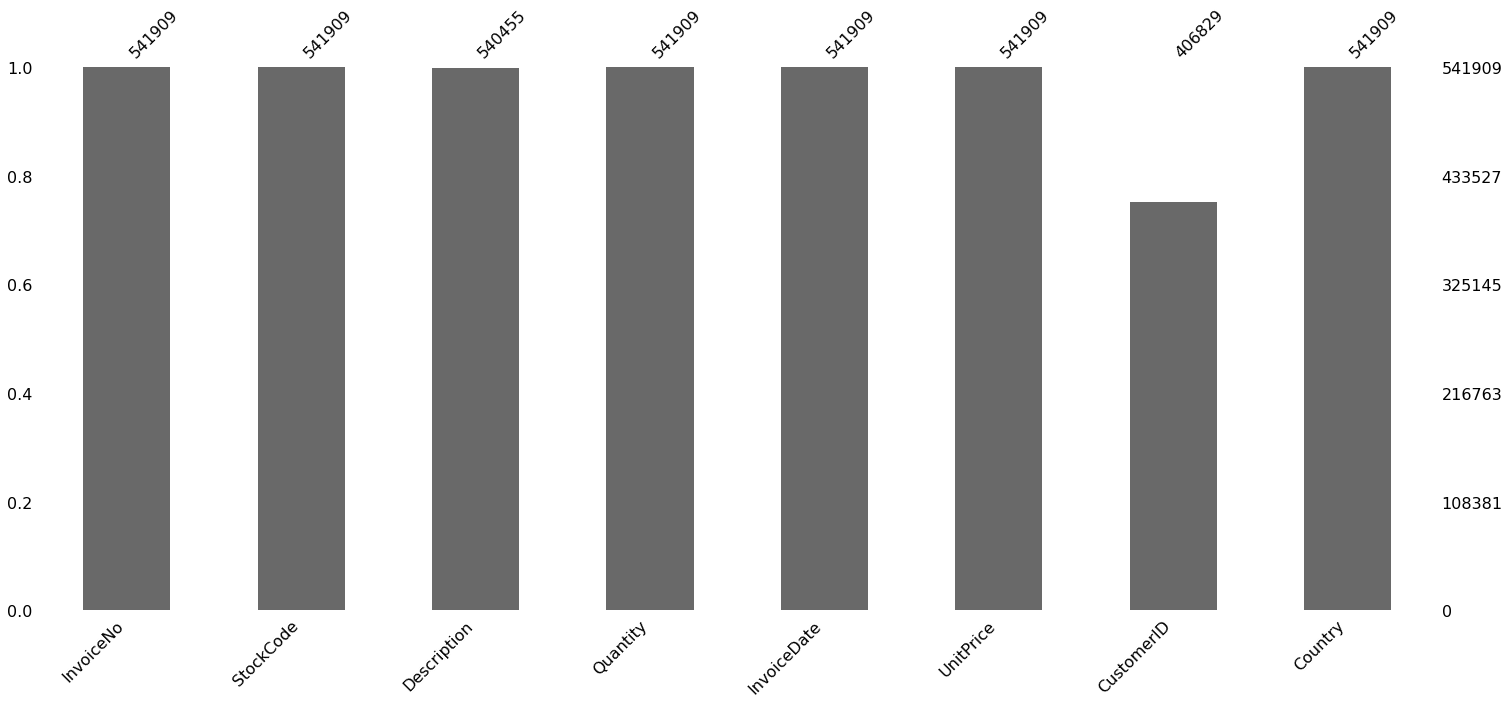

In [ ]:
msno.bar(df)

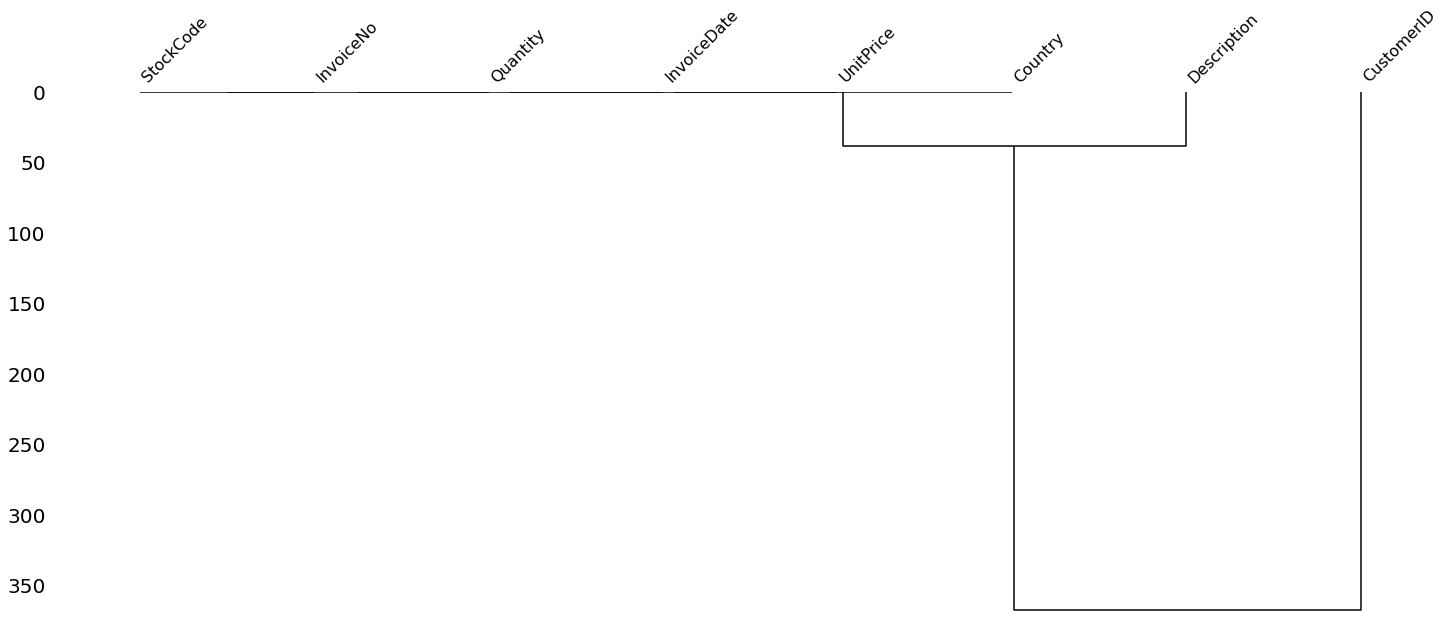

In [ ]:
msno.dendrogram(df)

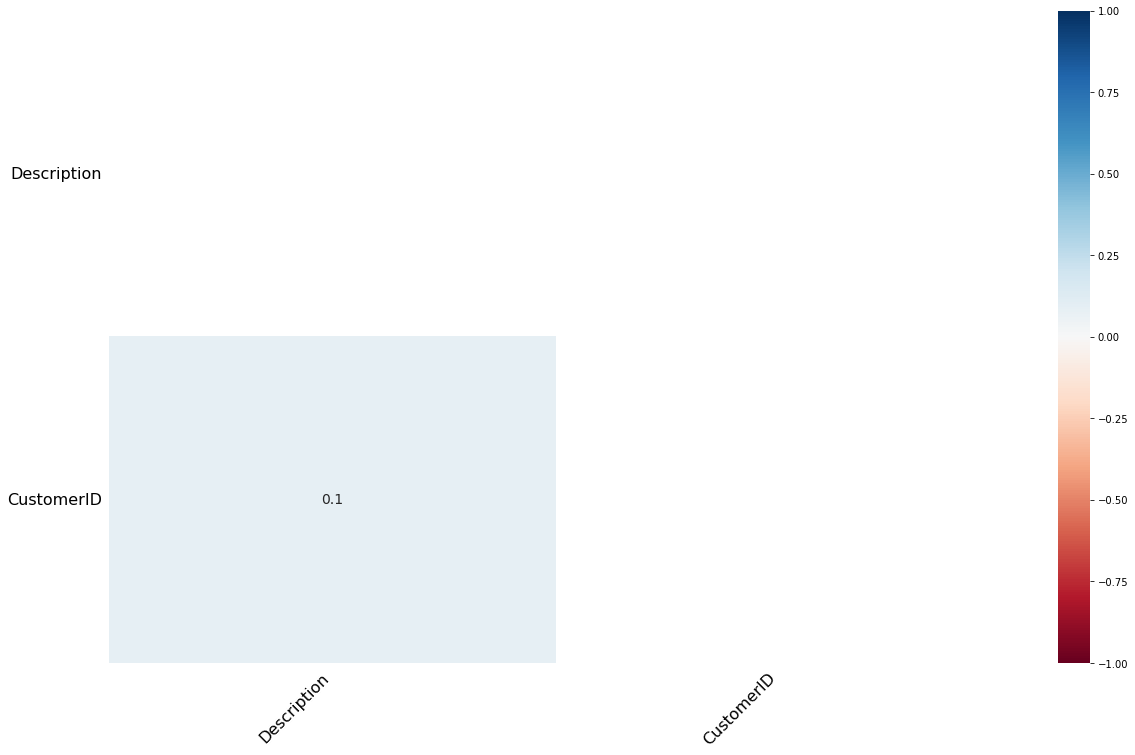

In [ ]:
msno.heatmap(df)

In [ ]:
df_cleaned = df.dropna(axis=0, how='any')

In [ ]:
df_cleaned.shape

(406829, 8)

In [ ]:
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_cleaned.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df_cleaned.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_cleaned[df_cleaned['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df_cleaned[(df_cleaned['CustomerID']==17315) & (df_cleaned['StockCode']==21845)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
display(df_cleaned['InvoiceDate'].min())
display(df_cleaned['InvoiceDate'].max())


Timestamp('2010-12-01 08:26:00')

Timestamp('2011-12-09 12:50:00')

## Cohort Analysis

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
def get_month(x): return dt.datetime(x.year, x.month,1)
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].apply(get_month)
grouping = df_cleaned.groupby('CustomerID')['InvoiceMonth']
df_cleaned['CohortMonth']=grouping.transform('min')
df_cleaned.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [ ]:
invoice_year, invoice_month, _ = get_date_int(df_cleaned, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df_cleaned, 'CohortMonth')
years_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
df_cleaned['CohortIndex']= years_diff*12 + month_diff+1
df_cleaned.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [ ]:
cohort_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: CohortMonth, Length: 406829, dtype: int64

In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  object        
 7   Country       406829 non-null  object        
 8   InvoiceMonth  406829 non-null  datetime64[ns]
 9   CohortMonth   406829 non-null  datetime64[ns]
 10  CohortIndex   406829 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(5)
memory usage: 37.2+ MB


In [ ]:
df_cleaned['CohortMonth'] = pd.to_datetime(df_cleaned['CohortMonth']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cohort_grouping = df_cleaned.groupby(['CohortMonth','CohortIndex'])
cohort_data = cohort_grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_sizes = cohort_counts.iloc[:,0]

In [ ]:
cohort_counts.index

Index([2010-12-01, 2011-01-01, 2011-02-01, 2011-03-01, 2011-04-01, 2011-05-01,
       2011-06-01, 2011-07-01, 2011-08-01, 2011-09-01, 2011-10-01, 2011-11-01,
       2011-12-01],
      dtype='object', name='CohortMonth')

In [ ]:
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [ ]:
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_mean_quant = cohort_grouping['Quantity'].mean()

In [ ]:
cohort_mean_quant = cohort_mean_quant.reset_index()

In [ ]:
average_quantity = cohort_mean_quant.pivot(index='CohortMonth',
                                      columns='CohortIndex',
                                      values = 'Quantity')
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.037691,14.603253,14.982141,14.801090,12.943024,14.318095,15.173387,14.759559,16.660455,16.691004,17.264954,12.823263,14.776623
2011-01-01,10.015502,12.573579,12.343099,10.940531,12.234048,14.895373,14.226042,14.385729,11.398390,9.883069,9.090436,9.541612,NaN
2011-02-01,10.830223,12.081317,18.563242,11.959050,11.117223,11.411479,13.346939,12.381845,10.272146,11.945771,12.645977,NaN,NaN
2011-03-01,9.762443,9.924222,12.207366,9.455425,13.579228,12.313412,13.162317,12.177130,10.517494,8.880203,NaN,NaN,NaN
2011-04-01,9.753962,10.105226,9.420617,11.598922,11.488889,8.220785,9.680620,9.289391,7.290019,NaN,NaN,NaN,NaN
2011-05-01,10.866930,9.030276,13.884270,11.805435,10.900268,8.668230,10.148510,7.371571,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.327849,13.681576,10.463847,13.275611,10.232734,9.758786,9.255627,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.722333,12.700952,7.142646,7.844268,6.013594,7.013233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.890294,5.958955,5.345404,5.976259,6.980110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
retention = retention.round(3)

In [ ]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02-01,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03-01,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04-01,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


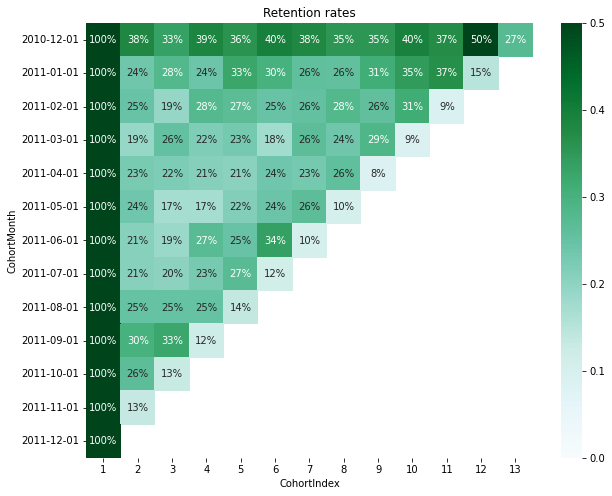

In [ ]:
plt.figure(figsize=(10,8))
plt.title ( 'Retention rates')
sns.heatmap(data=retention,
            annot = True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.5,
            cmap='BuGn')
plt.show()

In [ ]:
retention.index

Index([2010-12-01, 2011-01-01, 2011-02-01, 2011-03-01, 2011-04-01, 2011-05-01,
       2011-06-01, 2011-07-01, 2011-08-01, 2011-09-01, 2011-10-01, 2011-11-01,
       2011-12-01],
      dtype='object', name='CohortMonth')

## Recency, Frequency, Monetary Value Analysis

In [ ]:
print('Min:{} \nMax:{}'.format(min(df_cleaned.InvoiceDate),max(df_cleaned.InvoiceDate)))

Min:2010-12-01 08:26:00 
Max:2011-12-09 12:50:00


In [ ]:
snapshot_date = max(df_cleaned.InvoiceDate) + dt.timedelta(days=1)

In [ ]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
df_cleaned['TotalSum']=df_cleaned['Quantity']*df_cleaned['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
datamart = df_cleaned.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                                   'InvoiceNo': 'count',
                                                   'TotalSum':'sum'})
datamart.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalSum':'MonetaryValue'}, inplace=True)
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
# Recency Quartile
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart['Recency'],4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)

In [ ]:
f_labels = range(1,5)
m_labels = range(1,5)
f_quartiles = pd.qcut(datamart['Frequency'],4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'],4, labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

In [ ]:
datamart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        4372 non-null   int64   
 1   Frequency      4372 non-null   int64   
 2   MonetaryValue  4372 non-null   float64 
 3   R              4372 non-null   category
 4   F              4372 non-null   category
 5   M              4372 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 149.8+ KB


In [ ]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

In [ ]:
print(datamart)

            Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  RFM_Score
CustomerID                                                                   
12346.0         326          2           0.00  1  1  1   1.01.01.0          3
12347.0           2        182        4310.00  4  4  4   4.04.04.0         12
12348.0          75         31        1797.24  2  2  4   2.02.04.0          8
12349.0          19         73        1757.55  3  3  4   3.03.04.0         10
12350.0         310         17         334.40  1  1  2   1.01.02.0          4
...             ...        ...            ... .. .. ..         ...        ...
18280.0         278         10         180.60  1  1  1   1.01.01.0          3
18281.0         181          7          80.82  1  1  1   1.01.01.0          3
18282.0           8         13         176.60  4  1  1   4.01.01.0          6
18283.0           4        756        2094.88  4  4  4   4.04.04.0         12
18287.0          43         70        1837.28  3  3  4   3.03.04

In [ ]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
4.04.04.0    471
1.01.01.0    392
1.02.02.0    209
3.04.04.0    206
2.01.01.0    181
3.03.03.0    176
2.02.02.0    173
2.03.03.0    164
4.03.03.0    156
3.02.02.0    126
dtype: int64

In [ ]:
datamart[datamart['RFM_Segment']=='111']

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,


In [ ]:
datamart.groupby('RFM_Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(1)


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           264.8       7.8         109.1   392
4           174.5      13.9         227.1   391
5           153.0      21.2         346.8   517
6            94.3      28.5         491.8   468
7            78.8      39.7         724.2   447
8            62.7      57.0         974.7   467
9            44.2      79.0        1369.6   411
10           31.3     115.3        1894.0   440
11           20.5     193.9        3845.7   368
12            6.7     371.8        8850.7   471

In [ ]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,310,17,334.40,1,1,2,1.01.02.0,4


In [ ]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score']<9):
        return 'Silver'
    else:
        return 'Bronze'
datamart['General_segment']= datamart.apply(segment_me, axis=1)
datamart.groupby('General_segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_segment                                      
Bronze            219.7      10.9         168.0   783
Gold               25.2     195.1        4130.3  1690
Silver             98.9      36.1         625.8  1899

## Preprocessing

### k-means

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


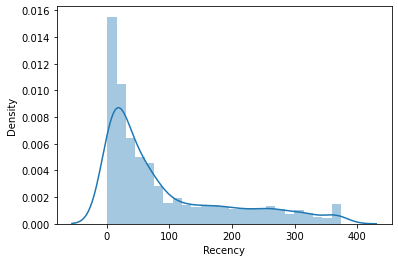

In [ ]:
sns.distplot(datamart['Recency'])
plt.show()

In [ ]:
datamart['Recency'].min()

1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


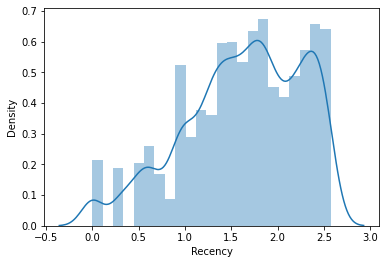

In [ ]:
sns.distplot(np.log10(datamart['Recency']))
plt.show()

In [ ]:
rfm_r = datamart['Recency']
rfm_r

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
          ... 
18280.0    278
18281.0    181
18282.0      8
18283.0      4
18287.0     43
Name: Recency, Length: 4372, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


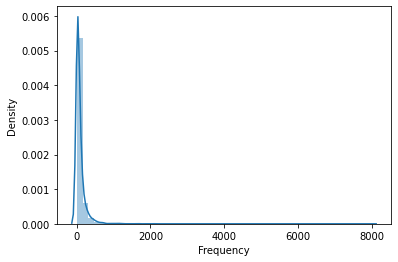

In [ ]:
sns.distplot(datamart['Frequency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


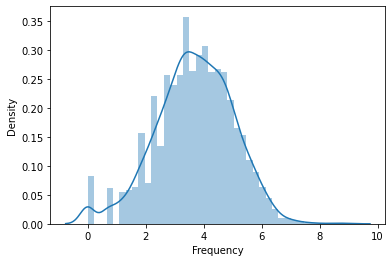

In [ ]:
datamart['Frequency'] = np.log(datamart['Frequency'])
sns.distplot(datamart['Frequency'])

In [ ]:
rfm_f= datamart['Frequency']
rfm_f

CustomerID
12346.0    0.693147
12347.0    5.204007
12348.0    3.433987
12349.0    4.290459
12350.0    2.833213
             ...   
18280.0    2.302585
18281.0    1.945910
18282.0    2.564949
18283.0    6.628041
18287.0    4.248495
Name: Frequency, Length: 4372, dtype: float64

In [ ]:
rfm = pd.merge(rfm_r, rfm_f, on = 'CustomerID', how='inner')

In [ ]:
rfm

,Recency,Frequency
CustomerID,,
12346.0,326,0.693147
12347.0,2,5.204007
12348.0,75,3.433987
12349.0,19,4.290459
12350.0,310,2.833213
...,...,...
18280.0,278,2.302585
18281.0,181,1.945910
18282.0,8,2.564949


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


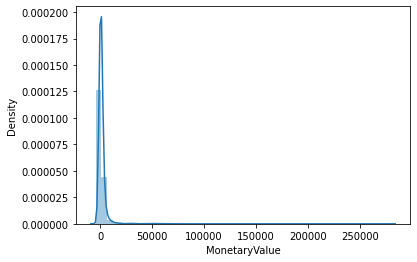

In [ ]:
sns.distplot(datamart['MonetaryValue'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


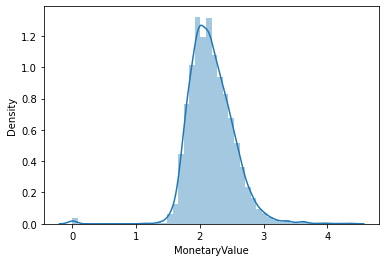

In [ ]:
sns.distplot((datamart['MonetaryValue'])**(1/8.5))

In [ ]:
rfm['MonetaryValue'] = (datamart['MonetaryValue'])

In [ ]:
rfm.mean()

Recency            92.047118
Frequency           3.684042
MonetaryValue    1898.459701
dtype: float64

In [ ]:
datamart_rfm = datamart[['Recency','Frequency','MonetaryValue']]

In [ ]:
datamart_rfm.describe().round(3)

,Recency,Frequency,MonetaryValue
count,4372.000,4372.000,4372.000
mean,92.047,3.684,1898.460
std,100.765,1.341,8219.345
min,1.000,0.000,-4287.630
25%,17.000,2.833,293.362
50%,50.000,3.738,648.075
75%,143.000,4.625,1611.725
max,374.000,8.985,279489.020


In [ ]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_segment
CustomerID,,,,,,,,,
12346.0,326,0.693147,0.00,1,1,1,1.01.01.0,3,Bronze
12347.0,2,5.204007,4310.00,4,4,4,4.04.04.0,12,Gold
12348.0,75,3.433987,1797.24,2,2,4,2.02.04.0,8,Silver
12349.0,19,4.290459,1757.55,3,3,4,3.03.04.0,10,Gold
12350.0,310,2.833213,334.40,1,1,2,1.01.02.0,4,Bronze
...,...,...,...,...,...,...,...,...,...
18280.0,278,2.302585,180.60,1,1,1,1.01.01.0,3,Bronze
18281.0,181,1.945910,80.82,1,1,1,1.01.01.0,3,Bronze
18282.0,8,2.564949,176.60,4,1,1,4.01.01.0,6,Silver


## Kmeans

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm)
rfm_normalized = scaler.transform(rfm)
print('mean:', rfm_normalized.mean(axis=0).round(3))
print('std:', rfm_normalized.std(axis=0).round(3))

mean: [-0.  0.  0.]
std: [1. 1. 1.]


In [ ]:
rfm.shape

(4372, 4)

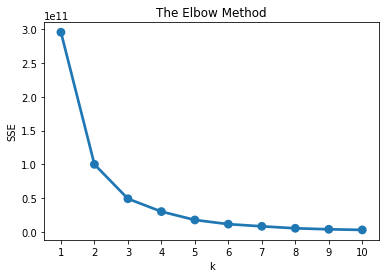

In [ ]:
sse={}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

Silhouette Analysis

silhouette score=𝑝−𝑞𝑚𝑎𝑥(𝑝,𝑞)
silhouette score
=
p
−
q
m
a
x
(
p
,
q
)
 
𝑝
p
  is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞
q
  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
from sklearn.metrics import silhouette_score
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.9186397925839457
For n_clusters=3, the silhouette score is 0.7647662597226134
For n_clusters=4, the silhouette score is 0.36334937126481126
For n_clusters=5, the silhouette score is 0.20225899242085693
For n_clusters=6, the silhouette score is 0.16277490056680033
For n_clusters=7, the silhouette score is 0.15509003304028354
For n_clusters=8, the silhouette score is 0.10866739531719394


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters=2, random_state=1)
kmeans.fit(rfm_normalized)
cluster_labels = kmeans.labels_

In [ ]:
rfm_k2 = rfm.assign(Cluster = cluster_labels)

In [ ]:
rfm_k2.groupby(['Cluster']).agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue':['mean','count']}).round(3)

Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster                                       
0         38.232     4.236      2573.058  3011
1        211.104     2.464       406.016  1361

### 3

In [ ]:
rfm_k2

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,0.693147,0.00,1
12347.0,2,5.204007,4310.00,0
12348.0,75,3.433987,1797.24,0
12349.0,19,4.290459,1757.55,0
12350.0,310,2.833213,334.40,1
...,...,...,...,...
18280.0,278,2.302585,180.60,1
18281.0,181,1.945910,80.82,1
18282.0,8,2.564949,176.60,0


In [ ]:
kmeans3 = KMeans (n_clusters=3, random_state=1)
kmeans3.fit(rfm_normalized)
cluster_labels3 = kmeans3.labels_

In [ ]:
rfm_k3 = rfm.assign(Cluster = cluster_labels3)

In [ ]:
rfm_k3.groupby(['Cluster']).agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(3)

Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster                                       
0         38.766     4.200      2156.985  3051
1        216.215     2.468       409.350  1314
2          7.000     7.022    168745.324     7

In [ ]:
display(rfm_k2.groupby(['Cluster']).agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue':['mean','count']}).round(3))
display(rfm_k3.groupby(['Cluster']).agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(3))

Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster                                       
0         38.232     4.236      2573.058  3011
1        211.104     2.464       406.016  1361

Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster                                       
0         38.766     4.200      2156.985  3051
1        216.215     2.468       409.350  1314
2          7.000     7.022    168745.324     7

In [ ]:
rfm_normalized = pd.DataFrame(rfm_normalized,
                                   index = rfm.index,
                                   columns = rfm.columns)
rfm_normalized['Cluster'] = rfm_k3['Cluster']

In [ ]:
rfm_normalized

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,2.322023,-2.230272,-0.231001,1
12347.0,-0.893733,1.133419,0.293432,0
12348.0,-0.169196,-0.186462,-0.012316,0
12349.0,-0.725005,0.452198,-0.017146,0
12350.0,2.163220,-0.634452,-0.190312,1
...,...,...,...,...
18280.0,1.845615,-1.030135,-0.209026,1
18281.0,0.882873,-1.296103,-0.221167,1
18282.0,-0.834182,-0.834493,-0.209513,0


In [ ]:
rfm_melt = pd.melt(rfm_normalized.reset_index(),
                        id_vars=['CustomerID','Cluster'],
                        value_vars = ['Recency', 'Frequency', 'MonetaryValue'],
                        var_name = 'Attribute',
                        value_name = 'Value')

In [ ]:
rfm_melt

,CustomerID,Cluster,Attribute,Value
0,12346.0,1,Recency,2.322023
1,12347.0,0,Recency,-0.893733
2,12348.0,0,Recency,-0.169196
3,12349.0,0,Recency,-0.725005
4,12350.0,1,Recency,2.163220
...,...,...,...,...
13111,18280.0,1,MonetaryValue,-0.209026
13112,18281.0,1,MonetaryValue,-0.221167
13113,18282.0,0,MonetaryValue,-0.209513
13114,18283.0,0,MonetaryValue,0.023900


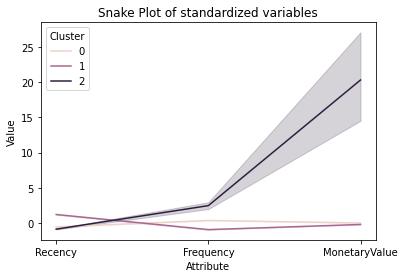

In [ ]:
plt.title('Snake Plot of standardized variables')
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=rfm_melt)

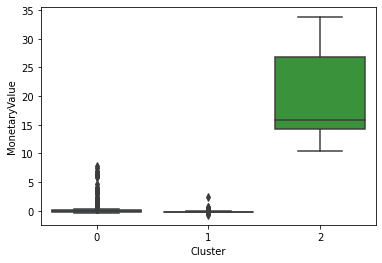

In [ ]:
sns.boxplot(x='Cluster', y='MonetaryValue', data=rfm_normalized)

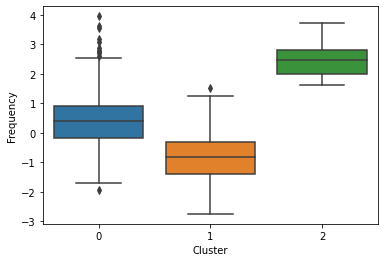

In [ ]:
sns.boxplot(x='Cluster', y='Frequency', data=rfm_normalized)

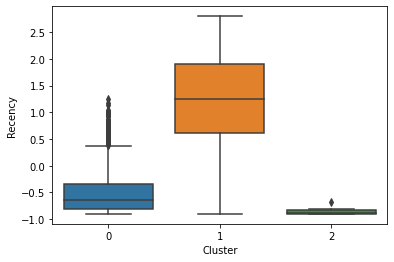

In [ ]:
sns.boxplot(x='Cluster', y='Recency', data=rfm_normalized)

In [ ]:
cluster_avg = rfm_k3.groupby(['Cluster']).mean()
population_avg = rfm.mean()
relative_imp = cluster_avg / population_avg - 1

In [ ]:
relative_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.578850,0.140026,0.136177
1,1.348964,-0.329956,-0.784378
2,-0.923952,0.906036,87.885386


In [ ]:
population_avg

Recency            92.047118
Frequency           3.684042
MonetaryValue    1898.459701
dtype: float64

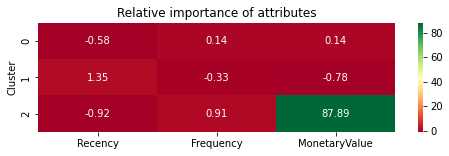

In [ ]:
plt.figure(figsize=(8,2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## Hierarchy

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram

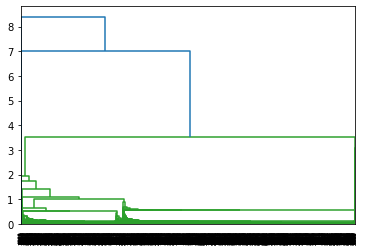

In [ ]:
# Single linkage: 

mergings = linkage(rfm_normalized, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

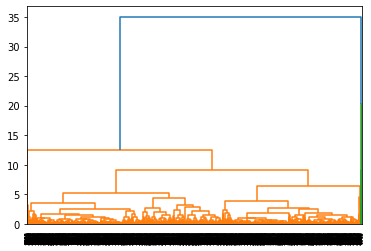

In [ ]:
# Complete linkage

mergings = linkage(rfm_normalized, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

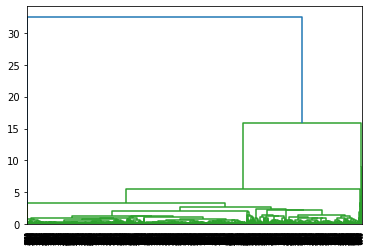

In [ ]:
# Average linkage

mergings = linkage(rfm_normalized, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

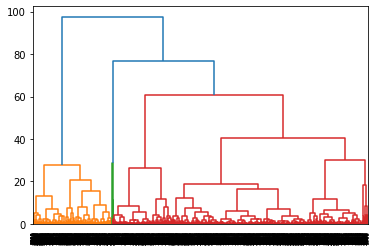

In [ ]:
mergings = linkage(rfm_normalized, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# 3 clusters
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
rfm_k3

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,0.693147,0.00,1
12347.0,2,5.204007,4310.00,0
12348.0,75,3.433987,1797.24,0
12349.0,19,4.290459,1757.55,0
12350.0,310,2.833213,334.40,1
...,...,...,...,...
18280.0,278,2.302585,180.60,1
18281.0,181,1.945910,80.82,1
18282.0,8,2.564949,176.60,0


In [ ]:
rfm['H_Cluster_Labels'] = cluster_labels
rfm.head()

,Recency,Frequency,MonetaryValue,H_Cluster_Labels
CustomerID,,,,
12346.0,326,0.693147,0.00,0
12347.0,2,5.204007,4310.00,1
12348.0,75,3.433987,1797.24,1
12349.0,19,4.290459,1757.55,1
12350.0,310,2.833213,334.40,0


In [ ]:
rfm.groupby(['H_Cluster_Labels']).agg({'Recency':'mean','Frequency':'mean','MonetaryValue':'mean'}).round(3)

,Recency,Frequency,MonetaryValue
H_Cluster_Labels,,,
0,250.816,2.727,429.906
1,42.816,3.975,2004.646
2,7.000,7.022,168745.324


In [ ]:
display(rfm_k3.groupby(['Cluster']).agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(3))

Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster                                       
0         38.766     4.200      2156.985  3051
1        216.215     2.468       409.350  1314
2          7.000     7.022    168745.324     7